In [2]:
path = "/home/someone/me/main/svnit/mtech/sem3/research/res/dataset/ThermoDataBase/DM Group/DM%s_%s"
ds_path_l = "/home/someone/me/main/svnit/mtech/sem3/research/res/dataset/ThermoDataBase/DM Group/DM001_M/DM001_M_L.png"
ds_path_r = "/home/someone/me/main/svnit/mtech/sem3/research/res/dataset/ThermoDataBase/DM Group/DM001_M/DM001_M_R.png"

cpath = "/home/someone/me/main/svnit/mtech/sem3/research/res/dataset/ThermoDataBase/Control Group/CG%s_%s"


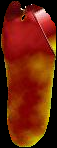

In [3]:
from PIL import Image
import numpy as np
import math

foot_l= Image.open(ds_path_l)
foot_l
# Letf Foot

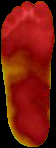

In [4]:
foot_r= Image.open(ds_path_r)
foot_r
# Right Foot

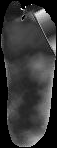

In [5]:
from PIL import Image

foot_l= Image.open(ds_path_l).convert("L")
foot_l
# Letf Foot

foot_r= Image.open(ds_path_r).convert("L")
foot_l
# Right Foot

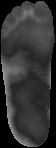

In [6]:
foot_r

In [7]:
data_fl = np.array(foot_l)
a = []
for x in data_fl:
    for y in x:
        a += [ y ]
min_s = 0
max_s = max(a)

## Gray Level Co-ocurrance Matrix
Dimension L = Max Grayscale Level In Image

Theta, Distance
i,j in GLCM -> Probability Of Pair (i, j) Value in Image


In [8]:
l = max_s
from skimage.feature import graycomatrix, graycoprops
glcm = graycomatrix(
        data_fl, distances=[1], angles=[45], levels=256, symmetric=True, normed=True
    )


In [9]:
def contrast(glcm):
    contrast = 0
    for i in range(256):
        for j in range(256):
            contrast += (( i - j )**2) * glcm[i, j][0][0]
    return contrast

def idm(glcm):
    idm = 0
    for i in range(0, 256):
        for j in range(256):
            if i + j == 0:
                continue
            p = glcm[i, j][0][0]
            idm += p / (i + (i - j) ** 2)
    return idm

def energy(glcm):
    energy = 0
    for i in range(256):
        for j in range(256):
            p = glcm[i, j][0][0]
            energy += p ** 2
    return energy

def corr(glcm):
    corr = 0
    ux = 0
    uy = 0
    for i in range(256):
        for j in range(256):
            p = glcm[i, j][0][0]
            ux += i * p
            uy += j * p
    sx = 0
    sy = 0
    
    for i in range(256):
        for j in range(256):
            p = glcm[i, j][0][0]
            sx += ((i - ux) ** 2) * p
            sy += ((i - uy) ** 2) * p
    
    for i in range(256):
        for j in range(256):
            p = glcm[i, j][0][0]
            corr += (((i - ux) * (j - uy) * p) / (sx * sy))
    
    return corr

In [11]:
def getTexturalFeatures(image):
    image = np.array(image)
    glcm = graycomatrix(
        image, distances=[1], angles=[45], levels=256, symmetric=True, normed=True
    )
    cont = contrast(glcm)
    en = energy(glcm)
    idmm = idm(glcm)
    corrr = corr(glcm)
    
    return [ cont, en, idmm, corrr]

data = np.array(data_fl)


In [12]:
def getHistogramFeatures(image):
    data = np.array(image)
    k = []
    [ [ k.append(j) for j in i ] for i in data ] 
    d = Counter(k)
    P = lambda x : d.get(x, 1/len(k)) / len(k)
    
    mean = np.sum([ g * P(g) for g in range(256) ])
    varr = np.sum([ (g - mean)**2 * P(g) for g in range(256) ])
    entropy = np.sum([ P(g) * math.log2(P(g)) for g in range(256) ])
    skew = np.sum([((1 / varr ** 3) * (( g - mean) ** 3) * P(g)) for g in range(256)])
    kurtosis = 0#((sum((k - mean)**4) / 256) / varr**4) - 3
    
    return [ mean, varr, entropy, skew, kurtosis]



In [13]:
def features(image):
    tf = getTexturalFeatures(image)
    hf = getHistogramFeatures(image)
    return tf + hf

In [17]:
from sklearn.cluster import KMeans
from collections import Counter
cluster_model = KMeans(n_clusters=4)

In [33]:
patient_count = 122
import os
data = []
fpath = []
for x in range(1, patient_count + 1):
    pno = ("%s"%x).zfill(3)
    path_m = path%(pno, "M")
    path_f = path%(pno, "F")
    gender = None
    
    npath = None
    if os.path.exists(path_m):
        npath = path_m
        gender = "M"
    else:
        npath = path_f
        gender = "F"
    ptag = "DM%s_%s"%(pno, gender)
    path_l = f"{npath}/{ptag}_L.png"
    path_r = f"{npath}/{ptag}_R.png"
    data += [ features(Image.open(path_l).convert("L")) ]
    data += [ features(Image.open(path_r).convert("L")) ]
    fpath += [ path_l ]
    fpath += [ path_r ]
    print("Reading Completed: %s"%(ptag))

Reading Completed: DM001_M
Reading Completed: DM002_M
Reading Completed: DM003_F
Reading Completed: DM004_M
Reading Completed: DM005_M
Reading Completed: DM006_F
Reading Completed: DM007_F
Reading Completed: DM008_M
Reading Completed: DM009_F
Reading Completed: DM010_M
Reading Completed: DM011_F
Reading Completed: DM012_F
Reading Completed: DM013_F
Reading Completed: DM014_F
Reading Completed: DM015_M
Reading Completed: DM016_F
Reading Completed: DM017_F
Reading Completed: DM018_M
Reading Completed: DM019_F
Reading Completed: DM020_F
Reading Completed: DM021_F
Reading Completed: DM022_F
Reading Completed: DM023_F
Reading Completed: DM024_M
Reading Completed: DM025_M
Reading Completed: DM026_M
Reading Completed: DM027_M
Reading Completed: DM028_M
Reading Completed: DM029_F
Reading Completed: DM030_F
Reading Completed: DM031_F
Reading Completed: DM032_M
Reading Completed: DM033_M
Reading Completed: DM034_F
Reading Completed: DM035_F
Reading Completed: DM036_M
Reading Completed: DM037_F
R

In [19]:
cluster_model.fit(data)
clusters = cluster_model.labels_

/home/someone/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
from IPython.display import display
indexer = [ None ] * 4
for i, x in enumerate(clusters[:50]): 
    if indexer[x] == None :
        indexer[x] = [ fpath[i] ]
    else:
        indexer[x] += [ fpath[i] ]
    


In [21]:
from IPython.display import HTML

def printImages(title, paths, row_c):
    doc = ""
    con = 0
    ss = "<td><img src=\"%s\">%s</img></td>"
    rows = ""
    for path in paths:
        path = "/".join(path.split("/")[-3:])
        rows += ss%(path, path.split("/")[-1])
        con += 1
        if con % row_c == 0 :
            doc += "<tr>%s</tr>"%(rows)
            rows = ""
    if len(rows) > 0: doc += "<tr>%s</tr>"%(rows)


    html = """
    <!DOCTYPE html>
    <p>%s</p>
    <table>
    %s
    </table>
    """%(title, doc)

    display(HTML(html))


In [22]:
printImages("First Cluster", indexer[0], 4)

In [23]:
printImages("Second Cluster", indexer[1], 4)

DM007_F_R.png,DM008_M_L.png,DM009_F_L.png,DM009_F_R.png
DM010_M_R.png,DM017_F_R.png,DM018_M_R.png,DM019_F_R.png
DM020_F_L.png,DM020_F_R.png,DM021_F_L.png,DM023_F_L.png


In [24]:
printImages("Third Cluster", indexer[2], 4)

DM002_M_L.png,DM004_M_L.png,DM008_M_R.png,DM010_M_L.png
DM013_F_L.png,DM017_F_L.png,DM019_F_L.png,DM021_F_R.png
DM022_F_L.png,DM022_F_R.png,DM023_F_R.png,DM024_M_R.png


In [25]:
printImages("Fourth Cluster", indexer[3], 4)

In [26]:
import os
cdata = []
cfpath = []
for x in range(1, 45 + 1):
    pno = ("%s"%x).zfill(3)
    path_m = cpath%(pno, "M")
    path_f = cpath%(pno, "F")
    gender = None
    
    npath = None
    if os.path.exists(path_m):
        npath = path_m
        gender = "M"
    else:
        npath = path_f
        gender = "F"
    ptag = "CG%s_%s"%(pno, gender)
    path_l = f"{npath}/{ptag}_L.png"
    path_r = f"{npath}/{ptag}_R.png"
    cdata += [ features(Image.open(path_l).convert("L")) ]
    cdata += [ features(Image.open(path_r).convert("L")) ]
    cfpath += [ path_l ]
    cfpath += [ path_r ]
    print("Reading Completed: %s"%(ptag))

Reading Completed: CG001_M
Reading Completed: CG002_M
Reading Completed: CG003_M
Reading Completed: CG004_F
Reading Completed: CG005_F
Reading Completed: CG006_F
Reading Completed: CG007_F
Reading Completed: CG008_F
Reading Completed: CG009_M
Reading Completed: CG010_M
Reading Completed: CG011_F
Reading Completed: CG012_F
Reading Completed: CG013_M
Reading Completed: CG014_M
Reading Completed: CG015_M
Reading Completed: CG016_M
Reading Completed: CG017_F
Reading Completed: CG018_M
Reading Completed: CG019_F
Reading Completed: CG020_F
Reading Completed: CG021_M
Reading Completed: CG022_M
Reading Completed: CG023_F
Reading Completed: CG024_F
Reading Completed: CG025_M
Reading Completed: CG026_M
Reading Completed: CG027_M
Reading Completed: CG028_M
Reading Completed: CG029_F
Reading Completed: CG030_M
Reading Completed: CG031_M
Reading Completed: CG032_M
Reading Completed: CG033_M
Reading Completed: CG034_M
Reading Completed: CG035_M
Reading Completed: CG036_M
Reading Completed: CG037_M
R

In [27]:
ncluster = 2
from sklearn.cluster import KMeans
ccluster_model = KMeans(n_clusters=ncluster)
ccluster_model.fit(cdata+data)
cclusters = ccluster_model.labels_

/home/someone/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
cindexer = [ None ] * ncluster
sfpath = cfpath + fpath
for i, x in enumerate(cclusters):
    if cindexer[x] == None :
        cindexer[x] = [ sfpath[i] ]
    else:
        cindexer[x] += [ sfpath[i] ]
        


In [29]:
printImages("First Cluster", cindexer[0], 4)

CG001_M_L.png,CG001_M_R.png,CG004_F_L.png,CG004_F_R.png
CG005_F_L.png,CG005_F_R.png,CG007_F_L.png,CG007_F_R.png
CG008_F_L.png,CG008_F_R.png,CG009_M_L.png,CG009_M_R.png
CG010_M_L.png,CG010_M_R.png,CG011_F_L.png,CG011_F_R.png
CG012_F_R.png,CG013_M_L.png,CG013_M_R.png,CG014_M_L.png
CG016_M_L.png,CG016_M_R.png,CG017_F_L.png,CG017_F_R.png
CG019_F_L.png,CG019_F_R.png,CG020_F_L.png,CG020_F_R.png
CG021_M_L.png,CG021_M_R.png,CG022_M_L.png,CG022_M_R.png
CG023_F_L.png,CG023_F_R.png,CG025_M_L.png,CG025_M_R.png
CG026_M_L.png,CG026_M_R.png,CG027_M_L.png,CG027_M_R.png
CG028_M_L.png,CG028_M_R.png,CG029_F_L.png,CG029_F_R.png


In [30]:
#printImages("First Cluster", cindexer[1], 4)
cg = 0
for x in cindexer[0]:
    cg += 1 if x.find("Control Group") > 0 else 0
print(cg, len(cindexer[0]) - cg)


print(100 * (cg / len(cindexer[0])))
cg = 0
for x in cindexer[1]:
    cg += 1 if x.find("Control Group") > 0 else 0
print(cg, len(cindexer[1]) - cg)


print(100 * (cg / len(cindexer[1])))

64 130
32.98969072164948
26 114
18.571428571428573


## Diabetic Foot Classification




In [56]:
final_data = data + cdata

for i, x in enumerate(final_data):
    u = len(x) - 9
    while u > 0:
        x.pop()
        u -= 1
    x.append(i)
    if i < 244 : 
        x.append(1)
    else:
        x.append(0)

In [58]:
final_data[243]

[402.84409907722255,
 0.07048760803504926,
 0.0055736719555802535,
 0.00031625911847805755,
 70.02728715909561,
 2995.2834509659056,
 -5.7386028675409415,
 -1.7703589001493925e-07,
 0,
 243,
 1]

In [60]:
np.random.shuffle(final_data)

In [148]:
nd = np.array(final_data)
X = nd[:, :8]
Y = np.ravel(nd[:, -1:])


In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=89)
knn_clas = KNeighborsClassifier()
knn_clas.fit(x_train, y_train)

KNeighborsClassifier()

In [151]:
y_pred = knn_clas.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)

0.7128712871287128


<Axes: >

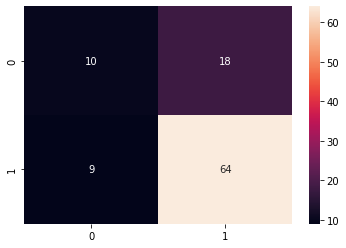

In [153]:
import seaborn as sea
sea.heatmap(cm, annot=True)

In [172]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DCT
smodel = SVC()
smodel.fit(x_train, y_train)
sy_pred = smodel.predict(x_test)

ty_pred = DCT().fit(x_train, y_train).predict(x_test)
evaluateClassification(x_test, y_test, ty_pred)

(0.7227722772277227,
 array([[12, 16],
        [12, 61]]),
 0.5,
 0.1643835616438356,
 0.42857142857142855,
 0.24742268041237112)

In [162]:
from sklearn.metrics import accuracy_score, confusion_matrix
def evaluateClassification(x_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    (tp, fp), (tn, fn) = cm
    precision = tp / (tp + tn)
    recall = tp / (tp + fn)
    spec = tn / (tn + fp)
    f1_score = 2*precision*recall / (precision + recall)
    
    return (acc, cm, precision, recall, spec, f1_score)



evaluateClassification(x_test, y_test, sy_pred)
#evaluateClassification(x_test, y_test, y_pred)
    

/tmp/ipykernel_1258016/1967397172.py:6: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + tn)


(0.7227722772277227,
 array([[ 0, 28],
        [ 0, 73]]),
 nan,
 0.0,
 0.0,
 nan)